<a href="https://colab.research.google.com/github/rlalramengi/DT_And_Ensemble_Bagging_Boosting-Project/blob/main/Bagging_and_Boosting_Ensemble_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the Business Problem


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from scipy.stats import zscore

%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataSet/techis-ds-wiki-main/DS/Step 2-3 DT and Ensemble/03_Project/talking_data.csv')

In [ ]:
data


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [ ]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [ ]:
data.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0
99999,119349,14,1,15,401,2017-11-07 14:32:27,NaN,0


In [ ]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


#**1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.**

In [ ]:
data.isnull().values.any()

True

In [ ]:
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (100000, 8)
Number of rows in the dataset: 100000
Number of columns in the dataset: 8


In [ ]:
data["click_time"].dtypes

dtype('O')

#**2. Which column has maximum number of unique values present among all the available columns**

In [ ]:
print("total number of unique values in ip colomn",len(data["ip"].unique()))

total number of unique values in ip colomn 34857


In [ ]:
print("total number of unique values in app colomn",len(data["app"].unique()))


total number of unique values in app colomn 161


In [ ]:
print("total number of unique values in device colomn",len(data["device"].unique()))


total number of unique values in device colomn 100


In [ ]:
print("total number of unique values in os colomn",len(data["os"].unique()))


total number of unique values in os colomn 130


In [ ]:
print("total number of unique values in channel colomn",len(data["channel"].unique()))


total number of unique values in channel colomn 161


In [ ]:
print("total number of unique values in click_time colomn",len(data["click_time"].unique()))


total number of unique values in click_time colomn 80350


In [ ]:
print("total number of unique values in attributed_time colomn",len(data["attributed_time"].unique()))


total number of unique values in attributed_time colomn 228


In [ ]:
print("total number of unique values in is_attributed colomn",len(data["is_attributed"].unique()))

total number of unique values in is_attributed colomn 2


#
**3. Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of less                than 20% clicks) and plot the rest..** 

In [ ]:
data["app"]

0        12
1        25
2        12
3        13
4        12
         ..
99995    11
99996     9
99997     3
99998    15
99999    14
Name: app, Length: 100000, dtype: int64

In [ ]:
app_id=data["app"].value_counts()
print(app_id)
total_sum=app_id.sum()
print("total_sum",total_sum)
len(app_id)
uaid=data["app"].unique()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
145        1
97         1
96         1
267        1
261        1
Name: app, Length: 161, dtype: int64
total_sum 100000


In [ ]:
limit=total_sum*0.02
X=app_id.values
greater=[]
less=[]
for i in range(161):
  if X[i]>limit:
    y=uaid[i]
    greater.append(y)
  else:
    y=uaid[i]
    less.append(y)

print("Frequent used app id ",greater)
print("less used app id ",less)

Frequent used app id  [12, 25, 13, 3, 1, 9, 2, 6, 20, 14]
less used app id  [64, 7, 15, 18, 11, 8, 23, 21, 56, 28, 36, 22, 26, 17, 27, 10, 60, 58, 19, 32, 24, 4, 53, 125, 204, 5, 202, 70, 47, 29, 55, 103, 35, 83, 208, 146, 161, 46, 62, 65, 110, 42, 150, 266, 151, 148, 72, 310, 93, 94, 71, 43, 39, 170, 37, 68, 54, 107, 398, 160, 30, 183, 315, 45, 121, 38, 82, 134, 33, 233, 100, 44, 109, 59, 74, 61, 104, 66, 67, 273, 192, 50, 118, 372, 48, 232, 165, 91, 123, 88, 538, 49, 16, 105, 536, 216, 425, 117, 551, 99, 86, 101, 394, 78, 95, 181, 76, 34, 124, 548, 108, 85, 145, 79, 97, 75, 52, 215, 84, 96, 81, 139, 267, 80, 137, 119, 474, 158, 293, 122, 112, 149, 363, 271, 31, 171, 87, 168, 176, 347, 163, 190, 486, 133, 302, 268, 407, 116, 92, 115, 261]


In [ ]:
print("Column Names:",data.columns.values)

Column Names: ['ip' 'app' 'device' 'os' 'channel' 'click_time' 'attributed_time'
 'is_attributed']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [ ]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [ ]:
data.dtypes

ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object

In [ ]:
data.click_time.unique()

array(['2017-11-07 09:30:38', '2017-11-07 13:40:27',
       '2017-11-07 18:05:24', ..., '2017-11-09 04:21:28',
       '2017-11-07 09:33:14', '2017-11-09 13:25:41'], dtype=object)

In [ ]:
from datetime import datetime
data.click_time=pd.to_datetime(data.click_time)

#**4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as                  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**


In [ ]:
data['Month']=pd.DatetimeIndex(data['click_time']).month
data['day_of_year']=pd.DatetimeIndex(data['click_time']).dayofyear
data['day_of_week']=pd.DatetimeIndex(data['click_time']).dayofweek
data['Hour']=pd.DatetimeIndex(data['click_time']).hour

In [ ]:
data=data.drop(['click_time','attributed_time'],axis=1)
data.head()

,ip,app,device,os,channel,is_attributed,Month,day_of_year,day_of_week,Hour
0,87540,12,1,13,497,0,11,311,1,9
1,105560,25,1,17,259,0,11,311,1,13
2,101424,12,1,19,212,0,11,311,1,18
3,94584,13,1,13,477,0,11,311,1,4
4,68413,12,1,1,178,0,11,313,3,9


In [ ]:
data.dtypes

ip               int64
app              int64
device           int64
os               int64
channel          int64
is_attributed    int64
Month            int64
day_of_year      int64
day_of_week      int64
Hour             int64
dtype: object

#5. Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and
     check the average download rates('is_attributed') for train and test data, scores should be comparable.**

In [ ]:
data.is_attributed.unique()

array([0, 1])

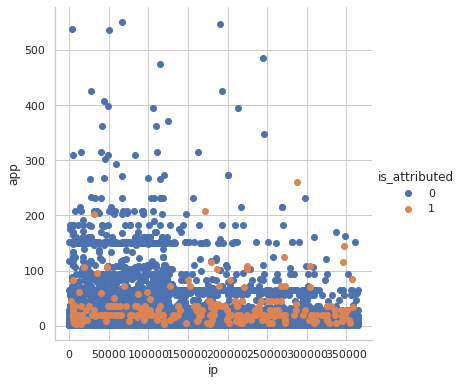

In [ ]:
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="is_attributed", size=5.5) \
   .map(plt.scatter, "ip", "app") \
   .add_legend();
plt.show();

In [ ]:
data.dtypes

ip               int64
app              int64
device           int64
os               int64
channel          int64
is_attributed    int64
Month            int64
day_of_year      int64
day_of_week      int64
Hour             int64
dtype: object

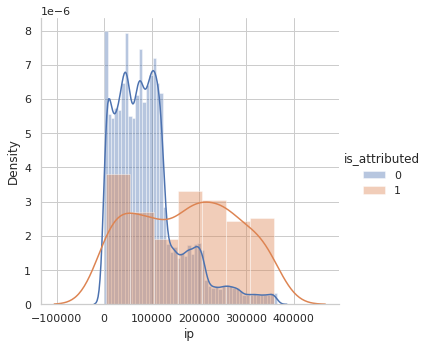

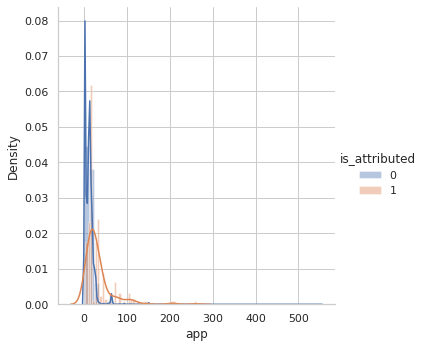

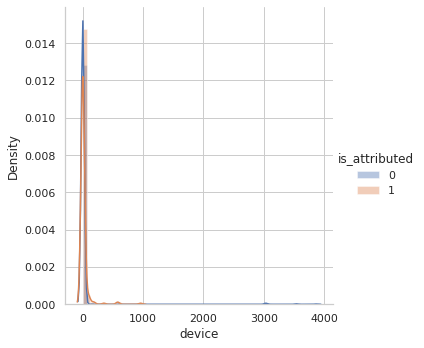

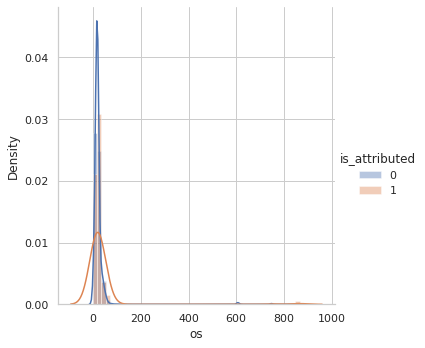

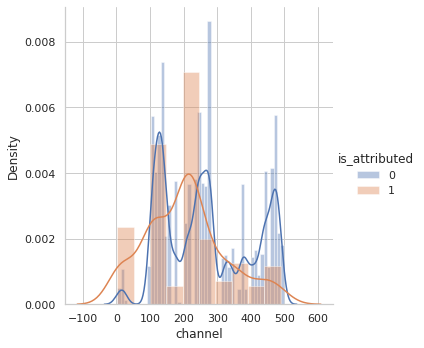

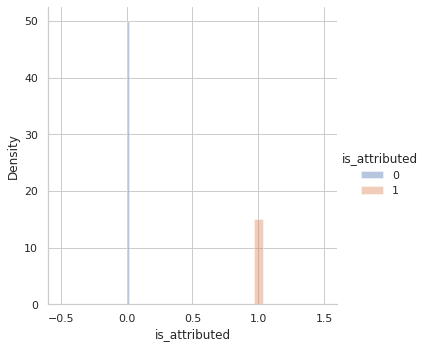

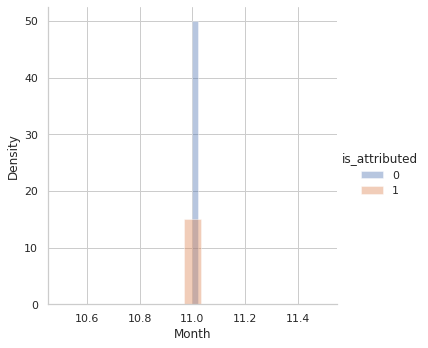

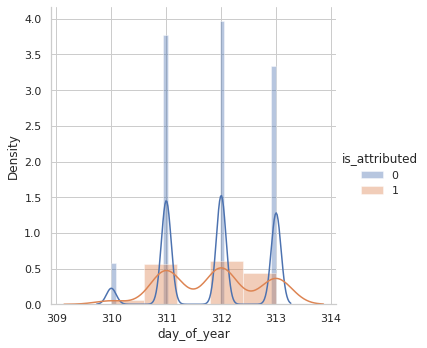

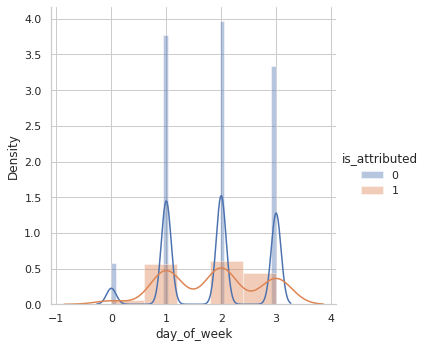

In [ ]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="is_attributed", size=5).map(sns.distplot, name).add_legend()
plt.show()

In [ ]:
X=data.drop(['is_attributed'],axis=1)
y=data["is_attributed"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=8)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80000, 9), (20000, 9), (80000,), (20000,))

#6. Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data.          NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.** 

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
model=XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**

In [ ]:
from sklearn.metrics import accuracy_score

print('The accuracy of the Xgboost is {}%'.format(round(accuracy_score(y_pred,y_test)*100,2)))


The accuracy of the Xgboost is 99.81%


In [ ]:
y_pred = model.predict_proba(X_test)
y_pred

array([[9.9988085e-01, 1.1916077e-04],
       [9.9959576e-01, 4.0423786e-04],
       [9.9975532e-01, 2.4467913e-04],
       ...,
       [9.9986601e-01, 1.3398939e-04],
       [9.9966645e-01, 3.3351779e-04],
       [9.9983305e-01, 1.6693842e-04]], dtype=float32)

#8. Compute feature importance score and name the top 5 features/columns .**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.99785
The confusion matrix of Bagging classifier model is
[[19950     8]
 [   35     7]]


In [ ]:
test_pred=bgcl.predict_proba(X_test)
test_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#10.  On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and              why?What does AUC/ROC score signifies?

In [ ]:
auc=metrics.roc_auc_score(y_test,y_pred[:,1])
print('AUC/ROC = {} %'.format(auc*100))

AUC/ROC = 92.73539910001479 %


#11.  What is the accuracy for BaggingClassifier and XGBoostClassifier?()

In [ ]:
roc=metrics.roc_auc_score(y_test,test_pred[:,1])
print('AUC/ROC = {} %'.format(roc*100))

AUC/ROC = 85.39468598342233 %
